In [81]:
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.html.widgets import interact
%matplotlib inline

C:\Users\09510\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [38]:
def type_reduce(f_t):
    return int(f_t.split(' ')[1])

## People

In [30]:
people = pd.read_csv('people.csv',index_col='people_id')

In [31]:
people.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189118 entries, ppl_100 to ppl_99997
Data columns (total 40 columns):
char_1     189118 non-null object
group_1    189118 non-null object
char_2     189118 non-null object
date       189118 non-null object
char_3     189118 non-null object
char_4     189118 non-null object
char_5     189118 non-null object
char_6     189118 non-null object
char_7     189118 non-null object
char_8     189118 non-null object
char_9     189118 non-null object
char_10    189118 non-null bool
char_11    189118 non-null bool
char_12    189118 non-null bool
char_13    189118 non-null bool
char_14    189118 non-null bool
char_15    189118 non-null bool
char_16    189118 non-null bool
char_17    189118 non-null bool
char_18    189118 non-null bool
char_19    189118 non-null bool
char_20    189118 non-null bool
char_21    189118 non-null bool
char_22    189118 non-null bool
char_23    189118 non-null bool
char_24    189118 non-null bool
char_25    189118 non-null bool

Each people has people_id, date, group_1 and 38 chars

In [32]:
people.head()

,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
people_id,,,,,,,,,,,,,,,,,,,,,
ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,...,False,True,True,False,False,True,True,True,False,36
ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,type 2,...,False,True,True,True,True,True,True,True,False,76
ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,type 2,...,False,False,True,True,True,True,False,True,True,99
ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,type 2,...,True,True,True,True,True,True,True,True,True,76
ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,type 2,...,False,False,True,False,False,False,True,True,False,84


In [33]:
people.describe()

,char_38
count,189118.000000
mean,50.327399
std,35.752127
min,0.000000
25%,10.000000
50%,58.000000
75%,83.000000
max,100.000000


In [ ]:
people.group_1.value_counts().hist(bins=100)

In [34]:
people.index.is_unique

True

In [131]:
people.group_1.is_unique

False

### Check char

#### Non binary (1-9)

In [51]:
nb_col = people.columns[people.columns.isin(['char_'+str(i+1) for i in xrange(9)])]
print nb_col

Index([u'char_1', u'char_2', u'char_3', u'char_4', u'char_5', u'char_6',
       u'char_7', u'char_8', u'char_9'],
      dtype='object')


In [61]:
nb=people[nb_col].applymap(type_reduce)

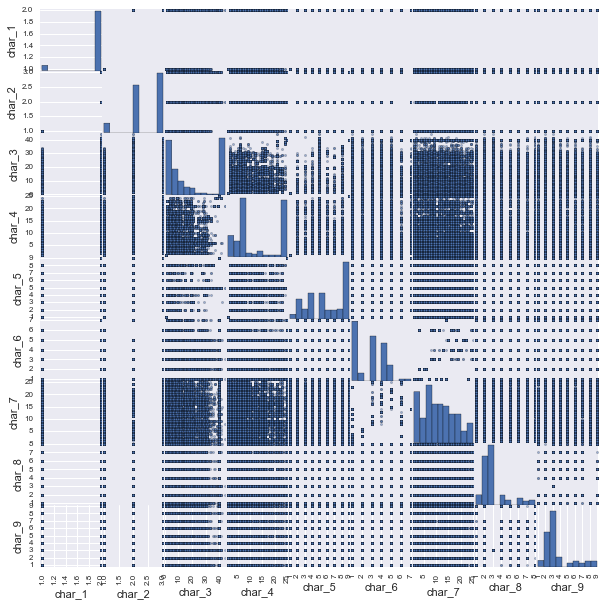

In [65]:
_=pd.scatter_matrix(nb,figsize=(12,12))

type 2    173867
type 1     15251
Name: char_1, dtype: int64


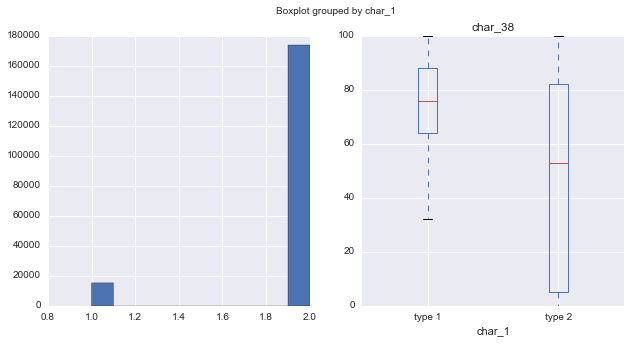

<function __main__.view_feat>

In [102]:
def view_feat(feat):
    print people[feat].value_counts()
    f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))    
    nb[feat].hist(ax=ax1)
    people.boxplot('char_38',by=feat,ax=ax2)
    plt.show()

interact(view_feat,
         feat=nb_col.tolist())

#### Binary (10-37)

In [74]:
b_col = people.columns[~people.columns.isin(['char_'+str(i+1) for i in xrange(9)])].difference(['group_1','date','char_38'])
print b_col

Index([u'char_10', u'char_11', u'char_12', u'char_13', u'char_14', u'char_15',
       u'char_16', u'char_17', u'char_18', u'char_19', u'char_20', u'char_21',
       u'char_22', u'char_23', u'char_24', u'char_25', u'char_26', u'char_27',
       u'char_28', u'char_29', u'char_30', u'char_31', u'char_32', u'char_33',
       u'char_34', u'char_35', u'char_36', u'char_37'],
      dtype='object')


In [97]:
b=people[b_col]

In [158]:
b.head()

,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,...,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37
people_id,,,,,,,,,,,,,,,,,,,,,
ppl_100,True,False,False,True,True,False,True,False,False,False,...,True,False,True,True,False,False,True,True,True,False
ppl_100002,False,False,True,True,False,False,False,True,False,False,...,False,False,True,True,True,True,True,True,True,False
ppl_100003,True,True,True,True,True,True,False,True,False,True,...,True,False,False,True,True,True,True,False,True,True
ppl_100004,True,True,True,True,True,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
ppl_100006,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False


In [166]:
b.char_10.value_counts()

False    141660
True      47458
Name: char_10, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000643F5E48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000076B890F0>]], dtype=object)

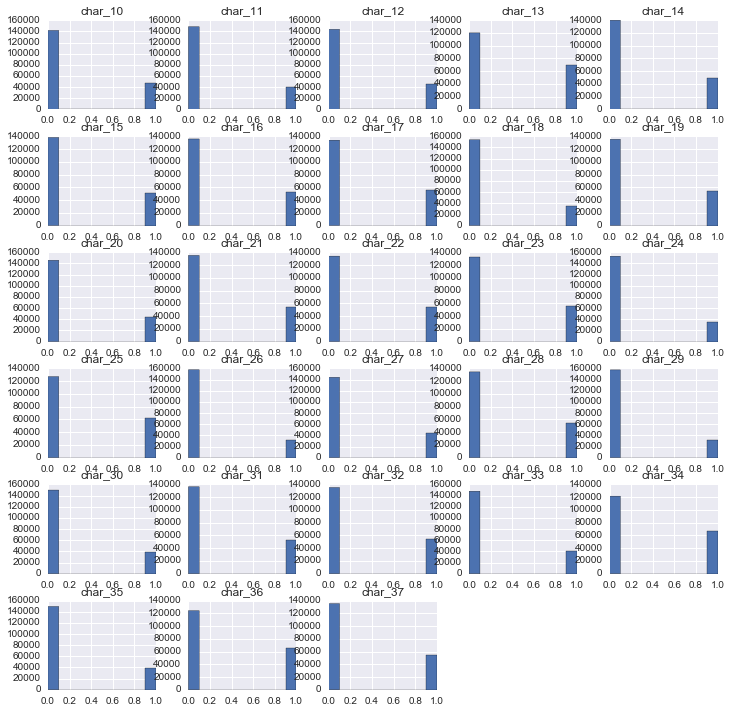

In [165]:
b.hist(figsize=(12,12))

Binary characteristics are mostly 0 (False)

False    133903
True      55215
Name: char_17, dtype: int64


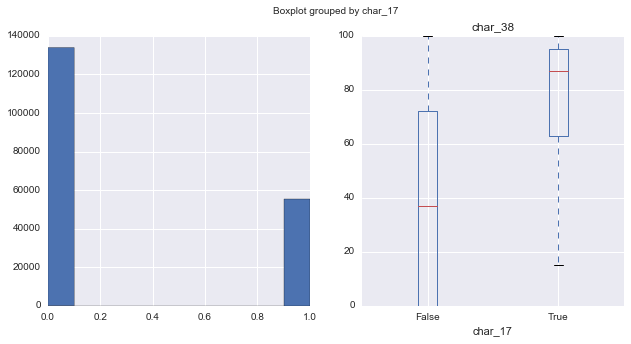

In [105]:
def view_feat2(feat):
    print people[feat].value_counts()
    f, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,5))    
    b[feat].hist(ax=ax1)
    people.hist()
    people.boxplot('char_38',by=feat,ax=ax2)
    plt.show()

interact(view_feat2,
         feat=b_col.tolist())

#### char_38

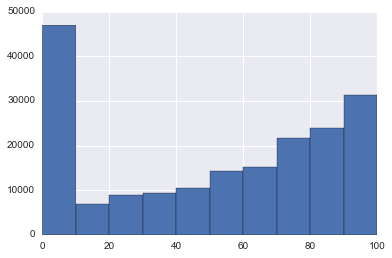

In [110]:
people['char_38'].hist()

## Activity

In [112]:
act_train = pd.read_csv('act_train.csv',index_col='people_id')

In [113]:
act_train.head()

,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
people_id,,,,,,,,,,,,,,
ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [114]:
act_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2197291 entries, ppl_100 to ppl_99994
Data columns (total 14 columns):
activity_id          object
date                 object
activity_category    object
char_1               object
char_2               object
char_3               object
char_4               object
char_5               object
char_6               object
char_7               object
char_8               object
char_9               object
char_10              object
outcome              int64
dtypes: int64(1), object(13)
memory usage: 251.5+ MB


In [126]:
act_train.activity_id.is_unique

True

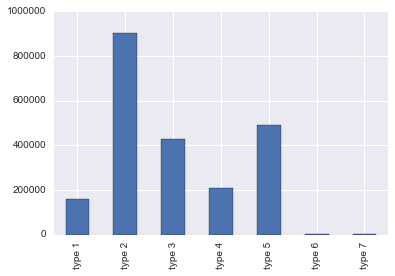

In [119]:
act_train.activity_category.value_counts().sort_index().plot(kind='bar')

#### Char_10 of activity from 2 to 7

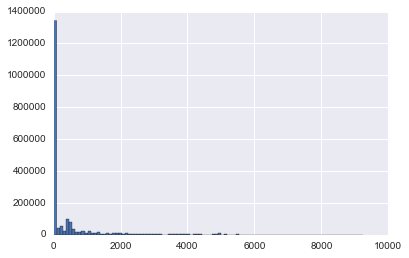

In [156]:
act_train[~(act_train.activity_category=='type 1')].char_10.map(type_reduce).hist(bins=100)

In [116]:
act_train.outcome.value_counts()

0    1221794
1     975497
Name: outcome, dtype: int64

### Is the outcome affected by activity type

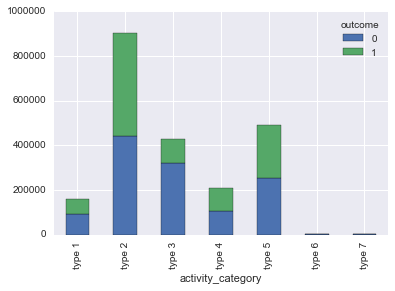

In [142]:
act_train.groupby(['activity_category', 'outcome']).size().unstack().plot(kind='bar',stacked=True)

In [128]:
act_train[act_train.activity_category=='type 1'].head()

,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
people_id,,,,,,,,,,,,,,
ppl_100025,act1_9923,2022-11-25,type 1,type 3,type 5,type 1,type 1,type 6,type 3,type 3,type 6,type 8,NaN,0
ppl_100033,act1_198174,2022-07-26,type 1,type 36,type 11,type 5,type 1,type 6,type 1,type 1,type 4,type 1,NaN,0
ppl_100033,act1_214090,2023-06-15,type 1,type 24,type 6,type 6,type 3,type 1,type 3,type 4,type 5,type 1,NaN,0
ppl_100033,act1_230588,2023-02-28,type 1,type 2,type 2,type 3,type 3,type 5,type 2,type 2,type 4,type 2,NaN,0
ppl_100033,act1_271874,2022-07-26,type 1,type 2,type 5,type 3,type 2,type 6,type 1,type 1,type 6,type 8,NaN,0


# Join People and Activity

In [124]:
pa = people.join(act_train,lsuffix='_p',rsuffix='_a')

In [125]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2235114 entries, ppl_100 to ppl_99997
Data columns (total 54 columns):
char_1_p             object
group_1              object
char_2_p             object
date_p               object
char_3_p             object
char_4_p             object
char_5_p             object
char_6_p             object
char_7_p             object
char_8_p             object
char_9_p             object
char_10_p            bool
char_11              bool
char_12              bool
char_13              bool
char_14              bool
char_15              bool
char_16              bool
char_17              bool
char_18              bool
char_19              bool
char_20              bool
char_21              bool
char_22              bool
char_23              bool
char_24              bool
char_25              bool
char_26              bool
char_27              bool
char_28              bool
char_29              bool
char_30              bool
char_31              bool
char

In [127]:
pa.head()

,char_1_p,group_1,char_2_p,date_p,char_3_p,char_4_p,char_5_p,char_6_p,char_7_p,char_8_p,...,char_2_a,char_3_a,char_4_a,char_5_a,char_6_a,char_7_a,char_8_a,char_9_a,char_10_a,outcome
people_id,,,,,,,,,,,,,,,,,,,,,
ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0.0
ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0.0
ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0.0
ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0.0
ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0.0


In [130]:
people.drop('date',axis=1)

,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
people_id,,,,,,,,,,,,,,,,,,,,,
ppl_100,type 2,group 17304,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,...,False,True,True,False,False,True,True,True,False,36
ppl_100002,type 2,group 8688,type 3,type 28,type 9,type 5,type 3,type 11,type 2,type 4,...,False,True,True,True,True,True,True,True,False,76
ppl_100003,type 2,group 33592,type 3,type 4,type 8,type 5,type 2,type 5,type 2,type 2,...,False,False,True,True,True,True,False,True,True,99
ppl_100004,type 2,group 22593,type 3,type 40,type 25,type 9,type 4,type 16,type 2,type 2,...,True,True,True,True,True,True,True,True,True,76
ppl_100006,type 2,group 6534,type 3,type 40,type 25,type 9,type 3,type 8,type 2,type 2,...,False,False,True,False,False,False,True,True,False,84
ppl_10001,type 2,group 25417,type 3,type 6,type 6,type 4,type 1,type 1,type 2,type 2,...,False,True,True,True,True,True,True,True,True,90
ppl_100010,type 2,group 17304,type 2,type 8,type 7,type 8,type 1,type 7,type 1,type 1,...,False,False,False,False,False,False,False,False,False,2
ppl_100013,type 2,group 4204,type 3,type 4,type 8,type 4,type 1,type 7,type 2,type 3,...,False,False,True,True,True,True,False,True,True,91
ppl_100019,type 2,group 45749,type 3,type 40,type 25,type 9,type 3,type 9,type 3,type 3,...,False,False,False,False,False,False,False,False,False,84
